# Ethylene Oxide Flowsheet

This [IPython notebook](http://ipython.org/notebook.html) demonstrates the formulation and solution of material balances for an ethylene oxide flowsheet using the [symbolic algebra package Sympy](http://sympy.org/en/index.html).

J.C. Kantor (Kantor.1@nd.edu)

The latest version of this IPython notebook is available at [http://github.com/jckantor/CBE20255](http://github.com/jckantor/CBE20255)  for noncommercial use under terms of the [Creative Commons Attribution Noncommericial ShareAlike License](http://creativecommons.org/licenses/by-nc-sa/4.0/).

## Introduction

While material balances for chemical processes are readily expressed as linear equations, extracting the matrix of coefficients for the linear equations can be tedious and error-prone. Fortunately, symbolic calculations can be used to solve material balance problems typical of introductory chemical engineering courses. This is demonstrated below using an example from the textbook [*
Introduction to Chemical Processes: Principles, Analysis, and Synthesis*](http://highered.mcgraw-hill.com/sites/0072849606/) by Regina Murphy.

## Problem Statement (Murphy 2005, Example 3.19)

The problem is to analyze the capability of an existing process for the production of [ethylene oxide](http://www.americanchemistry.com/ProductsTechnology/Ethylene-Oxide/PDF-Ethylene-Oxide-An-Essential-Raw-Material-for-Many-Important-Products-chart.pdf) by the reaction of ethylene and oxygen

$$2\,C_2H_4 + O_2 \longrightarrow 2\,C_2H_4O$$

The target production is 1.7 &#215; 10<sup>6</sup> kgmol/year of an ethylene oxide product with 98 mol% purity. The feedrate of ethylene is specified as 196 kgmol/hr, and of oxygen is specified as 84.5 kgmol/hr. The reactor has a nominal single pass conversion of 6% ethylene. The separator recovers 98% of the ethylene and 99.5% of the oxygen and 98% of the ethylene for recycle, and 97% of the ethylene oxide for the product stream.  

<img src="https://raw.github.com/jckantor/CBE20255/master/notebooks/images/ethylene_oxide_flowsheet.png" style="width:500px">

The problem is to find the nominal product purity and production rates, and to examine the sensitivity of product purity and production to the equipment specifications.

## Solution

[Sympy](http://sympy.org/en/index.html) is a library written in pure python for symbolic algebra. The solution strategy is to represent the stream variables and reaction extents as symbolic variables, then express the material balances and process specifications as symbolic equations, and finally to use the Sympy solver to find a nominal solution and to perform parametric analyses.

In [1]:
from sympy import *
init_printing()

### Variables

#### Stream Variables

The stream variables are systematically created using the Sympy `var` function, and added to the list `stream_variables`.

In [2]:
stream_variables = []

stream_variables += var('E1 O1')        # Stream 1
stream_variables += var('E2 O2 EO2')    # Stream 2
stream_variables += var('E3 O3 EO3')    # Stream 3
stream_variables += var('E4 O4 EO4')    # Stream 4
stream_variables += var('E5 O5 EO5')    # Stream 5

display(stream_variables)

[E₁, O₁, E₂, O₂, EO₂, E₃, O₃, EO₃, E₄, O₄, EO₄, E₅, O₅, EO₅]

#### Extent of Reaction

This problem includes only a single reaction in a single reactor. A corresponding extent of reaction variable is created, and a master list of all process variables is created.

In [3]:
extents = [var('X')]

variables = stream_variables + extents
display(variables)

[E₁, O₁, E₂, O₂, EO₂, E₃, O₃, EO₃, E₄, O₄, EO₄, E₅, O₅, EO₅, X]

### Equations

#### Material Balances

Material balances are written for each process unit using the symbolic stream and extent of reaction variables created above. Each material balance is expressed as the net rate of accumulation that will be set to zero to specify steady-state operation. The material balances are gathered into a list for each process unit, then the lists are concantenated to create a list of all material balances.

In [4]:
mixer = [
    Eq(0, E1 + E5 - E2),
    Eq(0, O1 + O5 - O2),
    Eq(0, EO5 - EO2)]

reactor = [
    Eq(0, E2 - E3 - 2*X),
    Eq(0, O2 - O3 - X),
    Eq(0, EO2 - EO3 + 2*X)]

separator = [
    Eq(0, E3 - E4 - E5),
    Eq(0, O3 - O4 - O5),
    Eq(0, EO3 - EO4 - EO5)]

material_balances = mixer + reactor + separator
for eqn in material_balances:
    display(eqn)

#### Specifications

Process specifications are written as equalities using the Sympy `Eq` function.

In [5]:
feed_spec = [
    Eq(E1, 196.0),
    Eq(O1, 84.5)]

reactor_spec = [
    Eq(E2 - E3, 0.06*E2)]

separator_spec = [
    Eq(E5, 0.98*E3),
    Eq(O5, 0.995*O3),
    Eq(EO4, 0.97*EO3)]

specifications = feed_spec + reactor_spec + separator_spec
for eqn in specifications:
    display(eqn)

### Degree of Freedom Analysis

A simple degree of freedom analysis is to compare the number of variables to the number of equations.

In [6]:
print "\n%d Variables = %d Stream Variables + %d Extents of Reaction " \
    % (size(variables),size(stream_variables),size(extents))

print "\n%d Stream Variables\n" % size(stream_variables)
for v in stream_variables:
    print "Variable: ", v

print "\n%d Extents of Reaction\n" % size(extents)
for v in extents:
    print "Extent: ", v



15 Variables = 14 Stream Variables + 1 Extents of Reaction 

14 Stream Variables

Variable:  E1
Variable:  O1
Variable:  E2
Variable:  O2
Variable:  EO2
Variable:  E3
Variable:  O3
Variable:  EO3
Variable:  E4
Variable:  O4
Variable:  EO4
Variable:  E5
Variable:  O5
Variable:  EO5

1 Extents of Reaction

Extent:  X


In [7]:
equations = material_balances + specifications
print "\n%d Equations = %d Material Balances + %d Specifications" \
    % (size(equations),size(material_balances),size(specifications))

print "\n%d Material Balances\n" % size(material_balances)
for mb in material_balances:
    print mb

print "\n%d Specifications\n" % size(specifications)
for spec in specifications:
    print spec


15 Equations = 9 Material Balances + 6 Specifications

9 Material Balances

0 == E1 - E2 + E5
0 == O1 - O2 + O5
0 == -EO2 + EO5
0 == E2 - E3 - 2*X
0 == O2 - O3 - X
0 == EO2 - EO3 + 2*X
0 == E3 - E4 - E5
0 == O3 - O4 - O5
0 == EO3 - EO4 - EO5

6 Specifications

E1 == 196.0
O1 == 84.5
E2 - E3 == 0.06*E2
E5 == 0.98*E3
O5 == 0.995*O3
EO4 == 0.97*EO3


### Solution

In [8]:
soln = solve(material_balances + specifications)

# display solution for each variable, rounded to 1 decimal place
for v in variables:
    display(Eq(v,round(soln[v],1)))

#### Production and Purity

In [9]:
purity = soln[EO4]/(soln[EO4]+soln[E4]+soln[O4])
production = 24*350*(soln[EO4] + soln[E4] + soln[O4])/1000000

print "Annual Production %4.2f million kgmol/year at %5.3f purity." \
    % (production,purity)

Annual Production 1.73 million kgmol/year at 0.725 purity.


#### Discussion Questions

* Do these numbers surprise you?  Why is the recycle rate so high?
* The purity specification is not met. Why?

### Parametric Analysis: Fractional Conversion of Ethylene

The problem asked for an analysis of the sensitivity of the problem results to changes in unit performance. This is implemented by restating the specifications where a key parameter is replaced by a symbolic variable, and the process the performance plotted as a function of the parameter.

In [10]:
feed_spec = [
    Eq(E1, 196.0),
    Eq(O1, 84.5)]

fconv = symbols('fconv')
reactor_spec = [
    Eq(E2 - E3, fconv*E2)]

separator_spec = [
    Eq(E5, 0.98*E3),
    Eq(O5, 0.995*O3),
    Eq(EO4, 0.97*EO3)]

specifications = feed_spec + reactor_spec + separator_spec
for s in specifications:
    display(s)

Recycle calculations are introduce a strong dependence of flow rates on parameters such as fraction conversion in the reactor and fractional recovery in separation units. To see this, here we solve for the flowrate of E<sub>2</sub> as a function of fractional conversion of ethylene in the reactor.

From the material balances

E<sub>2</sub> = E<sub>1</sub> + E<sub>5</sub><br>
E<sub>3</sub> = (1-f<sub>conv</sub>) E<sub>2</sub><br>
E<sub>5</sub> = 0.98 E<sub>3</sub><br>

Take a moment and solve these by hand.

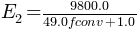

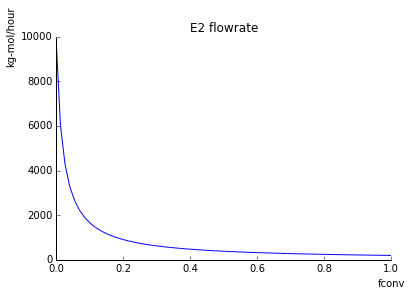

In [11]:
soln = solve(material_balances + specifications)[0]

display(Eq(E2,soln[E2]))
plot(soln[E2],(fconv,0,1),xlabel='fconv',ylabel='kg-mol/hour',title='E2 flowrate');

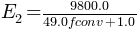

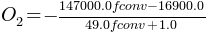

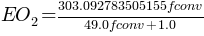

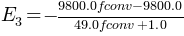

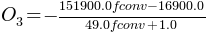

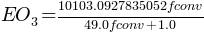

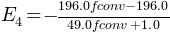

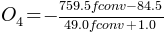

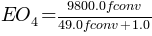

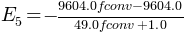

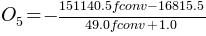

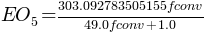

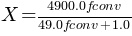

In [12]:
for v in variables:
    display(Eq(v, soln[v]))

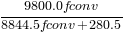

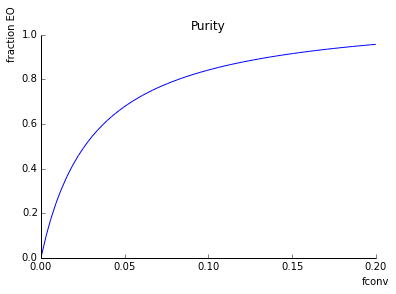

In [13]:
purity = soln[EO4]/(soln[EO4]+soln[E4]+soln[O4])

display(simplify(purity))
plot(purity,(fconv,0,.2),xlabel='fconv',ylabel='fraction EO',title='Purity');

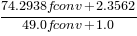

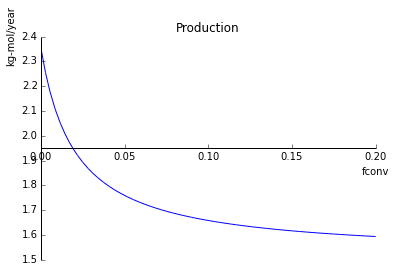

In [14]:
production = 24*350*(soln[EO4] + soln[E4] + soln[O4])/1000000

display(simplify(production))
plot(production,(fconv,0,0.2),xlabel='fconv',ylabel='kg-mol/year',title='Production');

### Parametric Analysis: Fractional Recovery of Ethylene Oxide to Product

Will improving the recovery of Ethylene Oxide to the product stream improve the product purity? Make a prediction, then check against the results of the following calculations.

In [15]:
feed_spec = [
    Eq(E1,196.0),
    Eq(O1, 84.5)]

reactor_spec = [
    Eq(E2 - E3, 0.06*E2)]

frcvr = symbols('frcvr')
separator_spec = [
    Eq(E5, 0.98*E3),
    Eq(O5, 0.995*O3),
    Eq(EO4, frcvr*EO3)]

specifications = feed_spec + reactor_spec + separator_spec
for s in specifications:
    display(s)

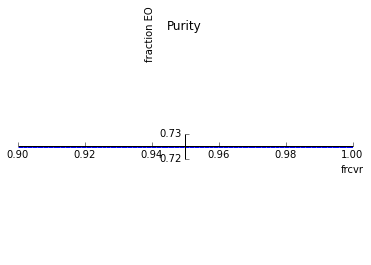

In [16]:
soln = solve(material_balances + specifications)[0]

purity = soln[EO4]/(soln[EO4]+soln[E4]+soln[O4])

display(purity)
plot(purity,(frcvr,0.9,1.00),xlabel='frcvr',ylabel='fraction EO',title='Purity');

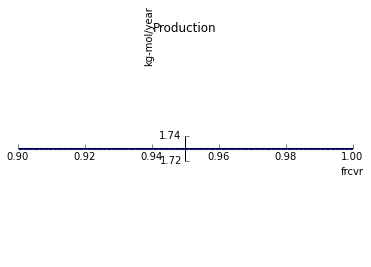

In [17]:
production = 24*350*(soln[EO4] + soln[E4] + soln[O4])/1000000
display(production)
plot(production,(frcvr,0.9,1.00),xlabel='frcvr',ylabel='kg-mol/year',title='Production');

#### Discussion Questions

* Is this what you expected?
* Why doesn't the product purity or production depend on the fractional recovery of ethylene oxide in the separator?

### Parametric Analysis: Fractional Recovery of Ethylene to Recycle

Increasing the fraction of ethylene recovered for recycle should improve product purity. Let's see what happens when we raise it.

In [18]:
feed_spec = [
    Eq(E1,196.0),
    Eq(O1, 84.5)]

reactor_spec = [
    Eq(E2 - E3, 0.06*E2)]

frcvr = symbols('frcvr')
separator_spec = [
    Eq(E5, frcvr*E3),
    Eq(O5, 0.995*O3),
    Eq(EO4, 0.97*EO3)]

specifications = feed_spec + reactor_spec + separator_spec
for s in specifications:
    display(s)

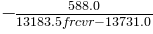

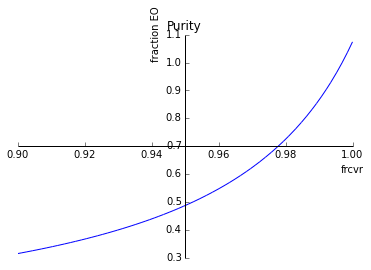

In [19]:
soln = solve(material_balances + specifications)[0]

purity = soln[EO4]/(soln[EO4]+soln[E4]+soln[O4])
display(simplify(purity))
plot(purity,(frcvr,0.9,1),xlabel='frcvr',ylabel='fraction EO',title='Purity');

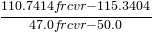

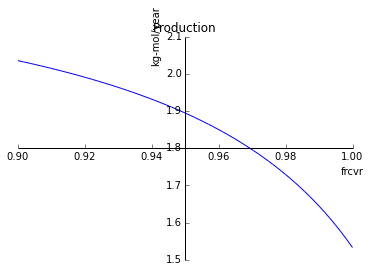

In [20]:
production = 24*350*(soln[EO4] + soln[E4] + soln[O4])/1000000
display(simplify(production))
plot(production,(frcvr,0.9,1.00),xlabel='frcvr',ylabel='kg-mol/year',title='Production');

#### Discussion Questions

* Did this behave as you expected?
* Increasing the ethylene recovery to 1.00 leads to a product purity greater than 1.0. Obviously that's not possible. What's going wrong?
* What is the maximum possible recovery of ethylene for recycle?

#### Parametric Analysis: Change the Oxygen Feed Rate

As we've discovered, the oxygen feedrate is not sufficient to consume all of the ethylene. Let's explore what happens if we change the oxygen feedrate.

In [21]:
oxyfeed = symbols('oxyfeed')
feed_spec = [
    Eq(E1,196.0),
    Eq(O1,oxyfeed)]

reactor_spec = [
    Eq(E2 - E3, 0.06*E2)]

separator_spec = [
    Eq(E5, 0.98*E3),
    Eq(O5, 0.995*O3),
    Eq(EO4, 0.97*EO3)]

specifications = feed_spec + reactor_spec + separator_spec
for s in specifications:
    display(s)

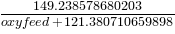

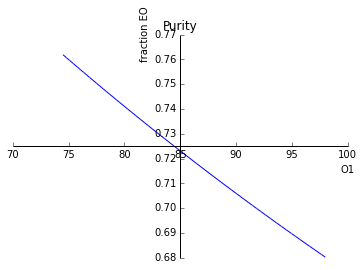

In [22]:
soln = solve(material_balances + specifications)

purity = soln[EO4]/(soln[EO4]+soln[E4]+soln[O4])
display(simplify(purity))
plot(purity,(oxyfeed,74.5,196/2),xlabel='O1',ylabel='fraction EO',title='Purity');

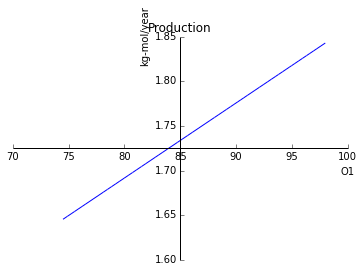

In [23]:
production = 24*350*(soln[EO4] + soln[E4] + soln[O4])/1000000
display(simplify(production))
plot(production,(oxyfeed,74.5,196/2),xlabel='O1',ylabel='kg-mol/year',title='Production');

####     Discussion Questions

* Did this behave as you expected?
* Why did the product purity decrease as the oxygen feedrate was increased?

## Conclusions

* The nominal process specifications yield a product purity of 72.5 mol% and a production of 1.73 million kgmol/year. The product purity falls significantly short of the desired purity of 98 mol%.
* Product purity can be increased by increasing the single-pass reactor conversion, increasing the recovery of ethylene to recycle, and decreasing oxygen feed. Individual, however, these changes are not sufficient to meet to the desired purity.
* Can you find specifications that will meet the 98% product purity specification?